In [1]:
import numpy as np

from gymnasium.wrappers import FlattenObservation
from rlville.environment import Market, RLVille

seed = 1

In [2]:
market = Market(20, seed=seed)
env = FlattenObservation(RLVille(market))
(market.db, env.actions)

/Users/cd976h/School/CS5180 - Reinforcement Learning/project/rlville/.venv/rlville/lib/python3.10/site-packages/gymnasium/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


(     id                                      icon              name revenue  \
 0     0             ./data/images/seeds/empty.jpg             empty       0   
 1     3        ./data/images/seeds/super-aloe.jpg        super-aloe      90   
 2    36     ./data/images/seeds/forget-me-not.jpg     forget-me-not     900   
 3    39         ./data/images/seeds/gladiolus.jpg         gladiolus     260   
 4    45              ./data/images/seeds/iris.jpg              iris     520   
 5    54              ./data/images/seeds/lily.jpg              lily     369   
 6    57     ./data/images/seeds/super-morning.jpg     super-morning     150   
 7    59             ./data/images/seeds/onion.jpg             onion     275   
 8    66      ./data/images/seeds/super-peanut.jpg      super-peanut      90   
 9    70         ./data/images/seeds/pineapple.jpg         pineapple     242   
 10   83       ./data/images/seeds/red-spinach.jpg       red-spinach     255   
 11   91           ./data/images/seeds/s

In [3]:
S, _ = env.reset(seed=seed)

for _ in range(100):
    A = np.random.choice(env.actions)
    S_prime, R, done, _, _ = env.step(A)
    print(S, A, R, S_prime, done)
    S = S_prime

    if done: break


[500.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.] 19 -290 [210.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.] False
[210.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.] 10 580 [790.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.] False
[790.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.] 16 70 [860.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   1.] False
[860.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   1.] 12 420 [1.28e+03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+0

/Users/cd976h/School/CS5180 - Reinforcement Learning/project/rlville/src/rlville/environment/environment.py:202: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 640x480 with 0 Axes>

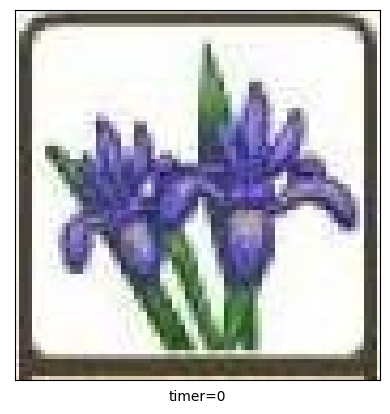

In [4]:
env = FlattenObservation(env)
S, _ = env.reset()
env.step(4)
env.render()

In [5]:
from rlville.models.agent import DQNAgent

balances, actions, best_actions, losses = (
    DQNAgent("rlville-dqn", env).train(
        500_000,
        t_wait=10_000,
        f_update_behaviour=32,
        f_update_target=1_000,
        replay_size=100
    )
)

100%|██████████| 500000/500000 [01:30<00:00, 5551.44it/s]


In [12]:
from rlville.visualization import plot_curves

plot_curves("RLVille - DQN", "Time", "Losses", [losses], ["dqn"], ["r"])

TypeError: 'NoneType' object is not callable